# Hist Gradient Boosting Classifier

In [52]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

### Data Preprocessing

In [37]:
# load data

crimes_df = pd.read_csv('Crimes_Dataset.csv')
suspects_df = pd.read_csv('Suspects_Dataset.csv')

In [38]:
# convert everything to lowercase

def lower(df):
    df.columns = df.columns.str.lower()
    df = df.apply(lambda col:col.str.lower() if col.dtype == 'object' else col)
    return df

crimes_df = lower(crimes_df)
suspects_df = lower(suspects_df)

In [39]:
# merge Crime_Dataset.csv and Suspects_Dataset.csv with index

df = pd.merge(crimes_df, suspects_df, left_on = 'index_crimes', right_on = 'importtindex_monster')
X = df.drop(columns = ['monster involved','index_crimes','date','monster', 'importtindex_monster'], axis = 1)
Y = df['monster']

In [40]:
# show features data

X.head(5)

,days of investigation,region,crime type,crime weapon,time of day,evidence found,criminal record,age,gender,height in cm,speed level,strength level,allergy,favorite food
0,77.0,mountain,nightly disturbance,NaN,night,bones,yes,1.0,f,152.0,26.0,8.0,silver,lasagna
1,48.0,forest,assault,pistol,night,teeth,no,53.0,m,171.0,87.0,7.0,silver,pesto pasta
2,31.0,castle,nightly disturbance,NaN,night,potions,no,1634.0,m,185.0,59.0,2.0,sunlight,humans
3,29.0,swamp,arson,pistol,dawn,potions,no,322.0,m,169.0,23.0,3.0,pumpkin,lasagna
4,59.0,village,nightly disturbance,pistol,night,potions,no,757.0,f,170.0,36.0,10.0,garlic,rats


In [41]:
# show target data

Y.head(5)

0    skeleton
1    werewolf
2       ghost
3       witch
4       ghost
Name: monster, dtype: object

In [42]:
# label encode categorical data
categorical_features = X.select_dtypes(include = ['object']).columns

X[categorical_features] = X[categorical_features].astype('category')
Y = Y.astype('category')

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   days of investigation  10000 non-null  float64 
 1   region                 9998 non-null   category
 2   crime type             10000 non-null  category
 3   crime weapon           7403 non-null   category
 4   time of day            10000 non-null  category
 5   evidence found         9995 non-null   category
 6   criminal record        10000 non-null  category
 7   age                    9995 non-null   float64 
 8   gender                 10000 non-null  category
 9   height in cm           10000 non-null  float64 
 10  speed level            9999 non-null   float64 
 11  strength level         9996 non-null   float64 
 12  allergy                10000 non-null  category
 13  favorite food          9998 non-null   category
dtypes: category(9), float64(5)
memory usage

In [44]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: monster
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


In [45]:
# split train & test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Train Hist Gradient Boosting Model

In [47]:
# create random forest model

model = HistGradientBoostingClassifier(random_state = 42)

In [48]:
# train

model.fit(X_train, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [49]:
# test

Y_predict = model.predict(X_test)

### Evaluate the Hist Gradient Boosting Model

In [50]:
# important measurements

# how many % of overall predictions were correct:
accuracy = accuracy_score(Y_test, Y_predict)

# (reliability of a guess) - if one type is predicted - how likely is it to be the correct prediction:
precision = precision_score(Y_test, Y_predict, average='weighted')

# (completeness of a class) 1 - how many Monsters does it miss per type:
recall = recall_score(Y_test, Y_predict, average='weighted')

# balancing between precision and recall
f1 = f1_score(Y_test, Y_predict, average='weighted')

# report by Type
report = classification_report(Y_test, Y_predict)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1 score:", f1)
print("\n")
print("classification report:\n\n", report)

accuracy: 0.978
precision: 0.9779908568219692
recall: 0.978
f1 score: 0.9779708706940178


classification report:

               precision    recall  f1-score   support

       ghost       0.97      0.96      0.97       338
    skeleton       0.97      0.96      0.96       317
     vampire       0.97      0.98      0.97       328
    werewolf       0.99      0.98      0.98       364
       witch       0.99      0.99      0.99       320
      zombie       0.98      0.99      0.99       333

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



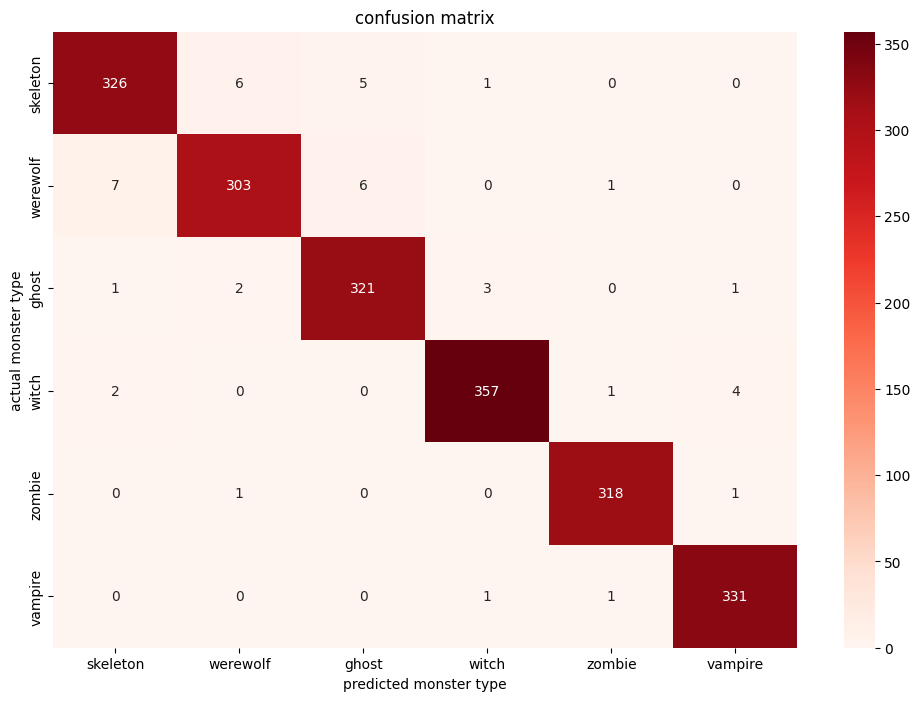

In [51]:
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=Y.unique(), yticklabels=Y.unique())
plt.title('confusion matrix')
plt.xlabel('predicted monster type')
plt.ylabel('actual monster type')
plt.show()